In [1]:
import uproot
import pandas as pd
import numpy as np
import glob


In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('belle2')

import os

In [48]:
import glob

base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v3_241129"
cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []
branches_all = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_Eta_genMotherPDG','etapip_Eta_genMotherID','etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'Pip_genMotherPDG','Pip_genMotherID',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi_K"]

    # Specify the branches you want to extract
    branches = ['Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

df_bkg = df_bkg.query('Dp_isSignal!=1')
df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

In [49]:
# df_bkg = df_bkg.query('num_Dstar_no_nan>0')
df_bkg = df_bkg.query('Pip_pionID<0.01')
df_bkg = df_bkg.query('Dp_M> 1.7 & Dp_M<2.1')
df_bkg = df_bkg.query('Dp_M> 1.8 & Dp_M<2.05')

In [50]:
# df_bkg['3pi_psum'] = df_bkg.query('Pip_pionID<0.01')

In [51]:
df_bkg.describe()

,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
count,5.221080e+05,522108.000000,522108.000000,522108.000000,5.221080e+05,5.221080e+05,522108.000000,5.221080e+05,460045.0,522108.000000,522108.000000,522108.000000,522108.000000,522108.000000,522108.000000,522108.000000
mean,4.961905e-04,3.589744,6.372469,2.287247,6.439905e+02,2.328884e+03,-0.209765,8.654737e-03,0.0,0.126068,1.483228,3.040997,2.106516,0.505533,1.916052,-0.957798
std,1.553437e-03,0.662894,7.230209,4.230406,7.475707e+04,9.451275e+04,0.658921,3.334380e-02,0.0,0.946655,1.075648,0.483358,1.037401,0.311274,0.072262,0.295959
min,0.000000e+00,2.154737,0.000000,0.000000,-1.003230e+05,-9.000211e+06,-0.999994,1.132763e-08,0.0,-1.000000,0.060551,2.500001,0.400000,0.000487,1.800000,-1.000000
25%,4.311663e-18,3.101773,2.000000,0.000000,2.300000e+01,0.000000e+00,-0.816747,1.080341e-03,0.0,-0.994312,0.551188,2.666216,1.135442,0.216538,1.852508,-1.000000
50%,3.401238e-09,3.533523,2.000000,1.000000,2.300000e+01,0.000000e+00,-0.457737,2.481328e-03,0.0,0.894382,1.136764,2.900884,2.215941,0.506807,1.911379,-1.000000
75%,2.606110e-05,3.967971,8.000000,2.000000,1.130000e+02,2.300000e+01,0.478855,5.647165e-03,0.0,0.998924,2.308889,3.285746,2.881011,0.795393,1.977421,-1.000000
max,9.999814e-03,24.703363,94.000000,54.000000,9.010221e+06,9.010443e+06,0.999643,9.973341e-01,0.0,1.000000,22.259993,18.907231,6.389995,0.999500,2.049999,4.000000


In [52]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

Pip_pionID                                            False
Dp_Psum                                               False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                            True
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                                      False
dtype: bool


In [53]:
base_path_sig = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC"
elements_sig = ["DptoetaKp_pipipi", "DptoetaKp_pipipi_cc"]
project_name = "241129_loose_v3"

file_list_sig = []
for element in elements_sig:
    pattern = f"{base_path_sig}/{element}/{project_name}/*.root"
    file_list_sig += glob.glob(pattern)
# print(file_list_sig)



In [54]:
dataframes_signal = []
for file_name in file_list_sig:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi_K"]

    # Specify the branches you want to extract
    # branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names
    branches = ['Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal = pd.concat(dataframes_signal, ignore_index=True)
df_signal = df_signal.query('Dp_isSignal==1')

In [55]:
# df_signal = df_signal.query('num_Dstar_no_nan>0')
df_signal = df_signal.query('Pip_pionID<0.01')



In [56]:
df_signal.describe()

,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
count,4.149800e+05,414980.000000,414980.00000,414980.00000,414980.000000,414980.000000,414980.000000,4.149800e+05,414980.0,414980.000000,414980.000000,414980.000000,414980.000000,414980.000000,414980.000000,414980.000000
mean,3.831583e-04,3.897133,9.46022,9.46022,3.212887,3.212887,-0.252161,2.310330e-02,1.0,0.924702,1.533189,3.369633,2.363944,0.501980,1.868309,-0.685701
std,1.349631e-03,0.725266,5.44924,5.44924,410.987937,410.987937,0.490297,3.114538e-02,0.0,0.362656,0.876329,0.563533,0.882548,0.318775,0.011309,0.745212
min,0.000000e+00,2.161271,3.00000,3.00000,-411.000000,-411.000000,-0.999989,1.467809e-07,1.0,-1.000000,0.087748,2.500001,0.400155,0.000875,1.507784,-1.000000
25%,3.579881e-15,3.364484,6.00000,6.00000,-411.000000,-411.000000,-0.679971,4.664282e-03,1.0,0.999596,0.818488,2.897719,1.723496,0.199121,1.864958,-1.000000
50%,4.599829e-09,3.819645,8.00000,8.00000,411.000000,411.000000,-0.311431,1.276559e-02,1.0,0.999964,1.415291,3.303140,2.335896,0.500000,1.868836,-1.000000
75%,1.155140e-05,4.358570,12.00000,12.00000,411.000000,411.000000,0.120007,2.969419e-02,1.0,0.999997,2.089990,3.781759,2.957219,0.804760,1.872536,-1.000000
max,9.999738e-03,7.092695,55.00000,55.00000,411.000000,411.000000,0.997298,9.933246e-01,1.0,1.000000,5.708853,5.222542,6.026983,0.998895,2.085091,5.000000


In [57]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

Pip_pionID                                            False
Dp_Psum                                               False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                           False
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                                      False
dtype: bool


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Ensure the signal and background datasets are balanced
min_size = min(len(df_signal), len(df_bkg))

# Sample an equal number of rows from both signal and background
df_signal_balanced = df_signal.sample(n=min_size, random_state=42)
df_bkg_balanced = df_bkg.sample(n=min_size, random_state=42)

# Assign labels: signal=1, background=0
df_signal_balanced['label'] = 1
df_bkg_balanced['label'] = 0

# Concatenate the signal and background datasets
df_combined = pd.concat([df_signal_balanced, df_bkg_balanced], ignore_index=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the specified columns
columns_to_drop = ['Dp_M','Pip_pionID','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_isSignal','Dp_CMS_p','CFT_prob', 'Dp_M', 'Pip_p', 'etapip_Eta_p', 'num_Dstar_no_nan'] 
                   # 'etapip_Eta_daughterDiffOfPhi_0_1', 'etapip_Eta_daughterAngle_0_1']
df_combined = df_combined.drop(columns=columns_to_drop)


In [59]:
df_combined.describe()

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,label
count,829960.000000,829960.000000,8.299600e+05,829960.000000,829960.0
mean,3.743181,-0.231067,1.586816e-02,0.525206,0.5
std,0.711482,0.581170,3.295386e-02,0.820622,0.5
min,2.154737,-0.999994,1.359305e-08,-1.000000,0.0
25%,3.222801,-0.757892,1.796495e-03,0.579436,0.0
50%,3.669701,-0.364020,5.180121e-03,0.999401,0.5
75%,4.168314,0.259206,1.675417e-02,0.999982,1.0
max,24.703363,0.999643,9.973341e-01,1.000000,1.0


In [60]:
plt.rcParams['font.family'] = 'DejaVu Sans'


In [18]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os
# # plt.rcParams['text.usetex'] = True

# # # Rename the features
# feature_names = {
#     'Pip_dr': r'$dr(\pi^+)$',
#     'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
#     'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
#     'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
# }

# # # Apply the renaming
# df_combined.rename(columns=feature_names, inplace=True)

# # Compute the correlation matrix
# corr_matrix = df_combined.drop(columns=['label']).corr()

# plt.rcParams['font.family'] = 'DejaVu Sans'

# # Plot the correlation matrix with larger annotation text
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
#             vmin=-1, vmax=1,  # Set the limits of the colormap
#             xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
#             annot_kws={"size": 14})  # Increase the size of the correlation numbers

# # Set the title and label sizes
# plt.title('Correlation Matrix of Features', fontsize=18)  # Title size
# plt.xticks(fontsize=14)  # X-axis label size
# plt.yticks(fontsize=14)  # Y-axis label size

# # # Ensure the path is expanded correctly
# # save_path = os.path.expanduser('~/PLOTS/DNN/belle2_etapip_gg_correlation_240919_coshel_momentum.png')

# # plt.tight_layout()
# # # Save the figure
# # plt.savefig(save_path)
# plt.savefig("MC15rd_etapip_pipipi_K_corr_loose_v2_again.png")

# plt.show()


In [61]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_combined.drop(columns='label')
y = df_combined['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# import joblib
# model_file = "best_xgb_model_etapip_pipipi.pkl"
# best_xgb_model = joblib.load(model_file)

In [63]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target
X = X_train
y = y_train

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for XGBoost
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }
# param_grid = {
#     'n_estimators': [100, 300, 500, 700, 900, 1100],
#     'max_depth': [5, 7, 9, 11],
#     'learning_rate': [0.005, 0.01, 0.1, 0.2],
#     'subsample': [0.8,0.9, 1.0],
#     'colsample_bytree': [0.8,0.9, 1.0]
# }
# # Initialize GridSearchCV with cross-validation
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=28
# )

# # Perform the grid search
# grid_search.fit(X, y)



# # Get the best model and its parameters
# best_xgb_model = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Save the best model if needed
# import joblib
# joblib.dump(best_xgb_model, 'MC15rd_best_xgb_model_etapip_pipipi_K_loose_v3.pkl')


xgb_model.fit(X,y)
best_xgb_model = xgb_model


/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


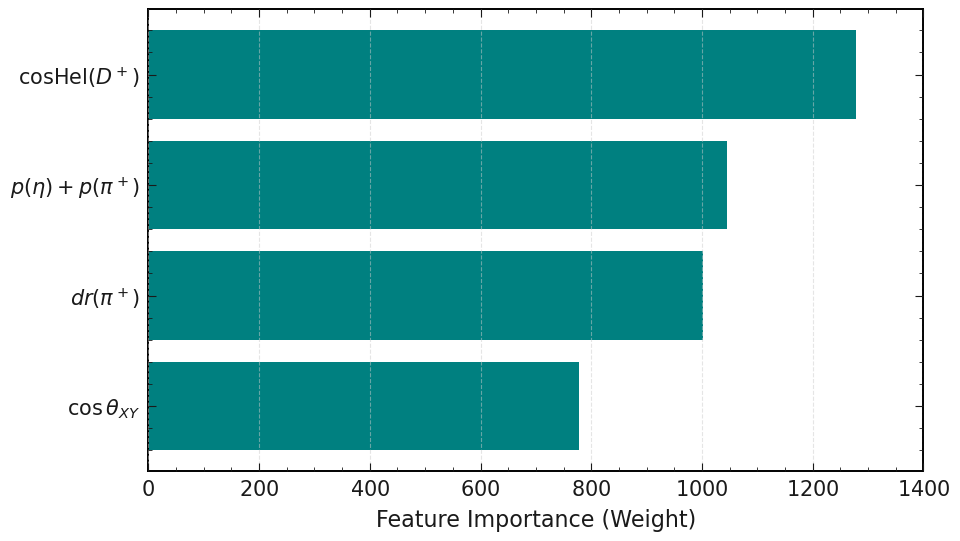

In [64]:
# Extract the underlying Booster object from the trained XGBClassifier
booster = best_xgb_model.get_booster()

# Get the feature importances with 'weight'
importance_dict = booster.get_score(importance_type='weight')

# The rest of the code remains the same
import pandas as pd

# Rename the features for display
feature_names = {
    'Pip_dr': r'$dr(\pi^+)$',
    'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
    'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
    'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
}

# Convert to a DataFrame for easier manipulation
importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Weight'])
importance_df.index = [feature_names.get(f, f) for f in importance_df.index]  # Rename using LaTeX labels
importance_df = importance_df.sort_values(by='Weight', ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['Weight'], color='teal')
plt.xlabel('Feature Importance (Weight)', fontsize=16)
# plt.title('Feature Importances with Customized Labels', fontsize=14)
plt.gca().invert_yaxis()  # Show the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.5)

# plt.savefig("MC15rd_etapip_pipipi_K_importance_loose_v3.png")

# Show plot
plt.show()

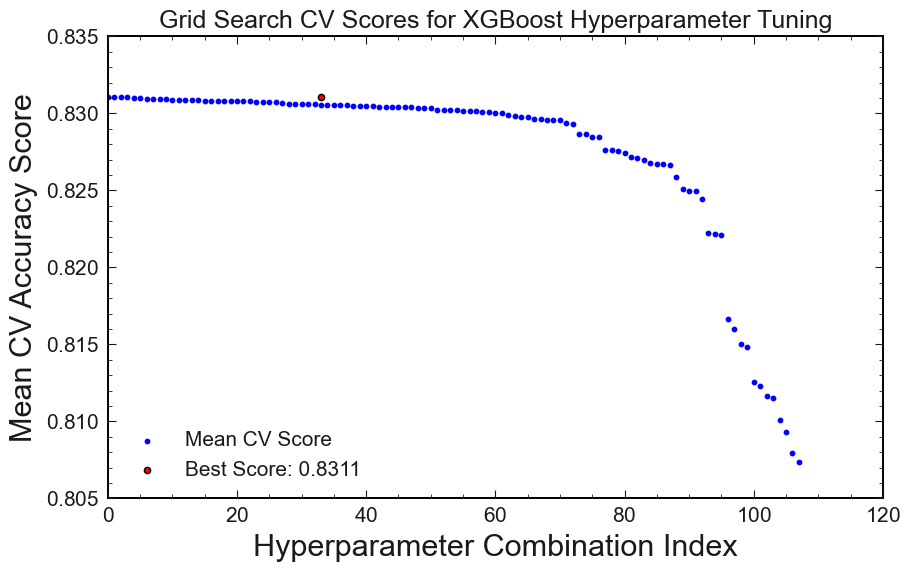

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract all mean cross-validation scores and parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
# results_df = pd.DataFrame(random_search.cv_results_)


# Sort results by mean test score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Highlight the best score
best_score = grid_search.best_score_
# best_score = random_search.best_score_

# Plotting the scores using Matplotlib
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(
    range(len(results_df)),
    results_df['mean_test_score'],
    c='blue',  # Color for the points
    s=10,
    marker='o',
    label='Mean CV Score'
)

# Highlighting the best score
best_index = results_df['mean_test_score'].idxmax()
plt.scatter(best_index, best_score, color='red', s=20, label=f'Best Score: {best_score:.4f}', edgecolor='black')

# Adding labels and legend
plt.title("Grid Search CV Scores for XGBoost Hyperparameter Tuning")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean CV Accuracy Score")
plt.legend(loc="lower left")
plt.xlim(0,)
# Save the figure
plt.savefig("MC15rd_etapip_pipipi_K_gridsearch_loose_v3.png")

# Show the plot
plt.show()


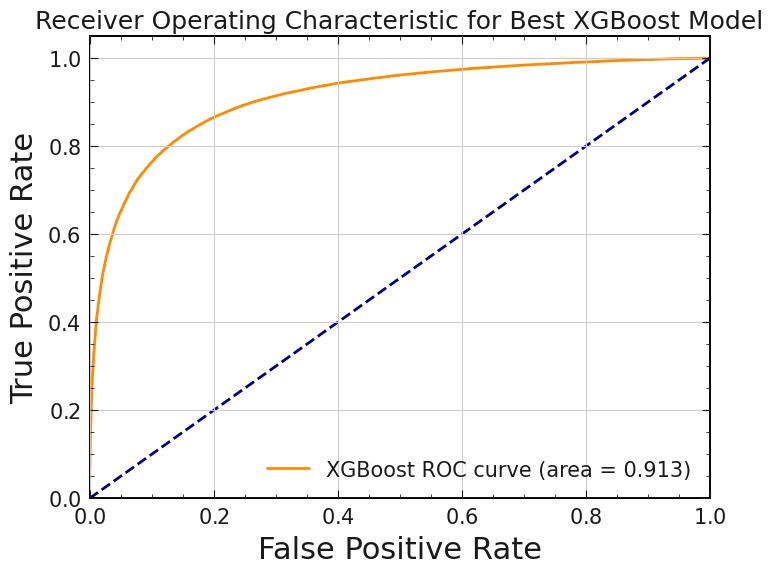

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)

# Uncomment the following lines to save the plot
# save_path = '~/PLOTS/XGBoost/240919_ROC_xgb.png'
# save_path_full = os.path.expanduser(save_path)
# plt.savefig(save_path_full)
# plt.savefig("MC15rd_etapip_pipipi_K_roc_loose_v3.png")

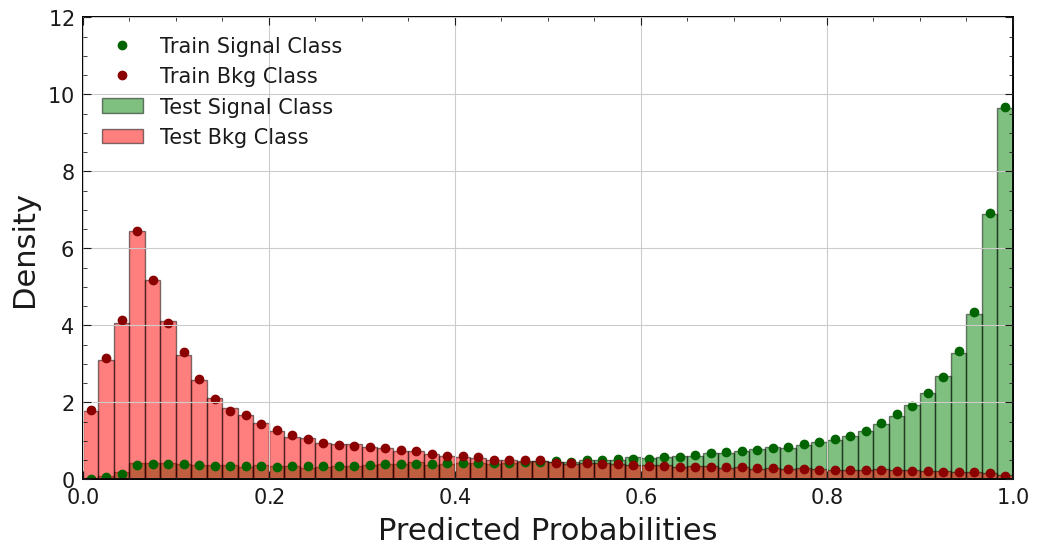

In [66]:
# Get predicted probabilities
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for train (as points) and test (as bars)
def plot_probability_histograms(y_train_true, y_train_probs, y_test_true, y_test_probs):
    plt.figure(figsize=(12, 6))
    
    # Define a common set of bins for both train and test
    bins = np.linspace(0, 1, 61)  # 60 bins from 0 to 1 for predicted probabilities

    # Test set: Plot histograms as bars
    plt.hist(y_test_probs[y_test_true == 1], bins=bins, alpha=0.5, label='Test Signal Class', color='green', edgecolor='black', density=True)
    plt.hist(y_test_probs[y_test_true == 0], bins=bins, alpha=0.5, label='Test Bkg Class', color='red', edgecolor='black', density=True)

    # Train set: Calculate histogram values for points
    hist_train_pos, _ = np.histogram(y_train_probs[y_train_true == 1], bins=bins, density=True)
    hist_train_neg, _ = np.histogram(y_train_probs[y_train_true == 0], bins=bins, density=True)

    # Calculate the bin centers (to place the points in the middle of each bin)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot the train set histograms as points
    plt.plot(bin_centers, hist_train_pos, 'o', label='Train Signal Class', color='darkgreen')
    plt.plot(bin_centers, hist_train_neg, 'o', label='Train Bkg Class', color='darkred')

    # Labels, title, and legend
    plt.xlabel('Predicted Probabilities')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0,1)

# Calculate predicted probabilities for the training and test sets
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Plot histograms with train set as points and test set as bars
plot_probability_histograms(
    y_train, y_train_probs,
    y_test, y_test_probs
)

# save_path = '~/PLOTS/HBDT/240919_outputs_momentum_sum.png'
# save_path_full = os.path.expanduser(save_path)

# plt.savefig(save_path_full)
# plt.savefig("MC15rd_train_test_etapip_pipipi_K_loose_v3.png")
plt.show()

In [67]:
base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v3_241129"
cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []

# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi_K"]

    # Specify the branches you want to extract
    branches = ['Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg_apply = pd.concat(dataframes, ignore_index=True)


In [68]:
df_bkg_apply = df_bkg_apply.query('Pip_pionID<0.01')

In [69]:
# Separate signal and background data
df_isSignal_true = df_bkg_apply.query('Dp_isSignal==1')
df_isSignal_false = df_bkg_apply.query('Dp_isSignal!=1')


In [70]:
# df_isSignal_true = df_bkg_apply.query('(Pip_genMotherID == etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 ')
# df_isSignal_false = df_bkg_apply.query('(Pip_genMotherID != etapip_Eta_genMotherID) |  abs(Pip_genMotherPDG)!=431')


In [71]:
df_isSignal_false

,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
1,4.662581e-24,3.080705,5.0,12.0,-313.0,-421.0,-0.771452,0.002245,0.0,-0.972846,0.588544,3.295171,2.492161,0.759277,2.033190,-1.0
2,4.662581e-24,2.731825,5.0,6.0,-313.0,-413.0,-0.727180,0.002245,0.0,-0.973285,0.588544,2.964250,2.143281,0.748373,1.893708,-1.0
3,1.502097e-05,3.242934,9.0,0.0,421.0,0.0,0.682071,0.003907,0.0,-0.963838,2.465991,2.683783,0.776943,0.005411,1.714009,-1.0
4,9.293776e-23,2.696497,19.0,0.0,-313.0,0.0,-0.783668,0.011589,0.0,0.999957,0.502699,3.329099,2.193799,0.069225,1.635630,-1.0
5,3.479459e-03,2.942235,17.0,2.0,-10323.0,23.0,-0.073166,0.009408,0.0,0.991497,1.366554,2.852239,1.575680,0.093564,1.645296,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624815,2.581990e-10,4.119900,2.0,2.0,23.0,23.0,-0.887161,0.003660,0.0,-0.997140,0.509621,3.508992,3.610279,0.022996,1.783329,-1.0
1624816,7.451022e-07,4.317794,2.0,2.0,23.0,23.0,-0.642972,0.000245,0.0,-0.982959,1.004801,3.212691,3.312994,0.809408,1.844853,-1.0
1624817,8.924539e-06,4.623025,2.0,2.0,23.0,23.0,-0.905318,0.005157,0.0,-0.999896,0.486485,3.350489,4.136540,0.235494,1.939080,-1.0
1624819,1.196405e-04,2.535337,2.0,2.0,23.0,23.0,-0.523759,0.000477,0.0,0.831500,0.756591,2.577116,1.778746,0.135510,1.658669,-1.0


In [72]:
# Drop the specified columns, but keep 'Dp_M' for reference
columns_to_drop = ['Pip_pionID','Dp_CMS_p','CFT_prob','etapip_Eta_p','Pip_p','num_Dstar_no_nan','Dp_M','Pip_genMotherID', 'etapip_Eta_genMotherID', 'Pip_genMotherPDG', 'Dp_isSignal', 'etapip_Eta_genMotherPDG']
df_isSignal_true_dropped = df_isSignal_true.drop(columns=columns_to_drop)
df_isSignal_false_dropped = df_isSignal_false.drop(columns=columns_to_drop)


In [73]:
df_isSignal_true_dropped

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane
649,4.597023,0.075892,0.034770,0.999994
682,3.644482,-0.060508,0.021049,0.999997
1334,3.197576,-0.089972,0.022247,0.999998
1360,4.483909,0.781285,0.007145,0.999988
1418,4.413187,-0.816577,0.008267,0.999937
...,...,...,...,...
1540401,3.531724,-0.823440,0.007733,0.999944
1540669,3.697708,0.005818,0.006027,0.997547
1541350,3.353073,0.488441,0.021907,0.999859
1541756,4.674212,-0.243685,0.002611,0.999585


In [74]:
# Reorder the columns of df_isSignal_true_dropped and df_isSignal_false_dropped to match the training data's feature order
df_isSignal_true_dropped = df_isSignal_true_dropped[best_xgb_model.get_booster().feature_names]
df_isSignal_false_dropped = df_isSignal_false_dropped[best_xgb_model.get_booster().feature_names]

# Now try to predict probabilities
isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]

isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]


In [75]:
# Optionally, you can combine the datasets back with 'Dp_M' if needed
df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)


In [76]:
# Prepare the data
df_combined_all_range = pd.concat([df_isSignal_true_combined, df_isSignal_false_combined], ignore_index=True)

df_combined_all_range['Dp_isSignal'] = df_combined_all_range['Dp_isSignal'].fillna(0)

In [77]:
# df_combined_all_range = df_combined_all_range.query('num_Dstar_no_nan-1000')

In [78]:
df_combined_all_range.columns.tolist()

['Pip_pionID',
 'Dp_Psum',
 'Pip_genMotherID',
 'etapip_Eta_genMotherID',
 'Pip_genMotherPDG',
 'etapip_Eta_genMotherPDG',
 'Dp_cosHelicityAngleMomentum',
 'Pip_dr',
 'Dp_isSignal',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Pip_p',
 'Dp_CMS_p',
 'etapip_Eta_p',
 'CFT_prob',
 'Dp_M',
 'num_Dstar_no_nan',
 'prob_signal']

In [79]:
df_combined = df_combined_all_range.query('Dp_M>1.85 & Dp_M<1.885')


# df_combined = df_combined_all_range.query('Dp_M>1.95 & Dp_M<1.985')

#signal MC fitting region
# df_combined = df_combined_all_range.query('Dp_M>1.82 & Dp_M<1.91')

(array([2711., 2759., 2764., 2784., 2750., 2700., 2735., 2798., 2655.,
        2612., 2742., 2795., 2725., 2903., 2833., 2827., 2832., 2793.,
        2851., 2707., 2670., 2657., 2641., 2750., 2620., 2615., 2595.,
        2666., 2696., 2617.]),
 array([1.85000096, 1.85116759, 1.85233421, 1.85350084, 1.85466747,
        1.8558341 , 1.85700072, 1.85816735, 1.85933398, 1.8605006 ,
        1.86166723, 1.86283386, 1.86400049, 1.86516711, 1.86633374,
        1.86750037, 1.86866699, 1.86983362, 1.87100025, 1.87216687,
        1.8733335 , 1.87450013, 1.87566676, 1.87683338, 1.87800001,
        1.87916664, 1.88033326, 1.88149989, 1.88266652, 1.88383315,
        1.88499977]),
 <BarContainer object of 30 artists>)

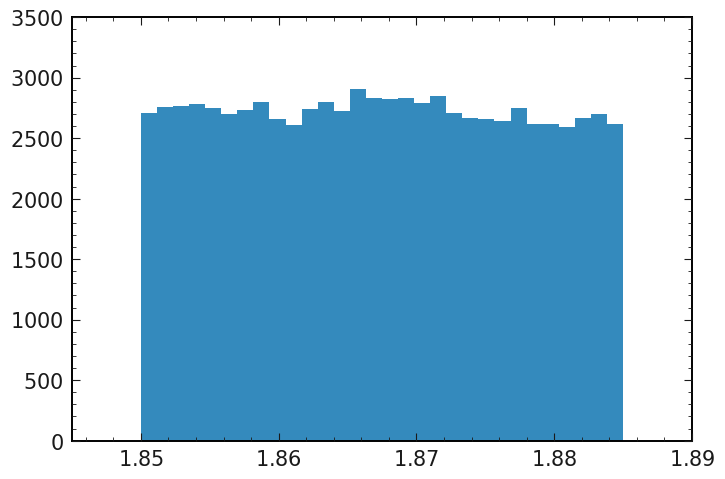

In [80]:
plt.hist(df_combined.Dp_M,bins=30)

In [81]:
unique_values = df_combined['Dp_isSignal'].unique()
print(unique_values)

[1. 0.]


In [82]:
df_combined 

,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan,prob_signal
0,4.620588e-06,4.597023,6.0,6.0,411.0,411.0,0.075892,0.034770,1.0,0.999994,2.405515,4.531484,2.191507,0.546568,1.870941,-1.0,0.992052
1,4.916948e-18,3.644482,8.0,8.0,-411.0,-411.0,-0.060508,0.021049,1.0,0.999997,1.712064,3.702464,1.932417,0.070271,1.870542,-1.0,0.982565
2,5.632447e-13,3.197576,21.0,21.0,-411.0,-411.0,-0.089972,0.022247,1.0,0.999998,1.469354,2.833763,1.728221,0.899945,1.872575,1.0,0.983853
3,1.370112e-06,4.483909,11.0,11.0,411.0,411.0,0.781285,0.007145,1.0,0.999988,3.663847,3.479669,0.820061,0.017543,1.873025,1.0,0.844825
4,6.140204e-14,4.413187,6.0,6.0,411.0,411.0,-0.816577,0.008267,1.0,0.999937,0.680883,4.384367,3.732304,0.020477,1.863199,-1.0,0.710052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268177,3.299137e-08,4.058968,2.0,0.0,23.0,0.0,0.220664,0.000259,0.0,0.989190,2.357488,3.966074,1.701481,0.052593,1.874755,-1.0,0.477286
1268182,1.817690e-12,3.398356,2.0,2.0,23.0,23.0,-0.732274,0.002049,0.0,-1.000000,0.677054,3.054254,2.721302,0.455691,1.860461,-1.0,0.063570
1268193,6.149219e-17,3.802076,5.0,0.0,313.0,0.0,-0.645410,0.000524,0.0,0.994241,0.888286,2.716583,2.913790,0.453341,1.882959,-1.0,0.284993
1268194,6.149219e-17,4.255802,5.0,2.0,313.0,23.0,-0.696950,0.000524,0.0,0.962217,0.888246,3.137665,3.367556,0.282388,1.878511,-1.0,0.235400


In [83]:
# test = (df_combined['Pip_genMotherID'] == df_combined['etapip_Eta_genMotherID']) & abs(df_combined['Pip_genMotherPDG'])==431

In [84]:
# test.describe()

Best cut value: 0.9400000000000001
Best figure of merit: 8.767434933288428


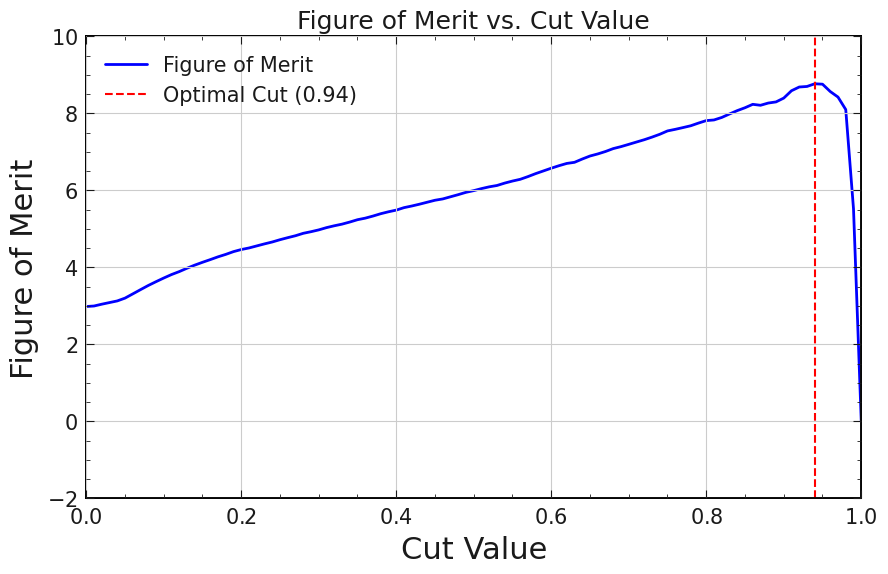

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scale = 1/4
#Define the figure of merit function using query
def figure_of_merit(df, cut_value):
    df_cut = df.query('prob_signal > @cut_value')
    # Nsig = (df_cut['Dp_isSignal'] == 1).sum()
    # Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
    Nsig = len(df_cut.query('Dp_isSignal==1'))
    Nbkg = len(df_cut.query('Dp_isSignal!=1'))
    if Nsig + Nbkg == 0:
        return 0
    return Nsig*scale / np.sqrt(Nsig*scale + Nbkg*scale)

# def figure_of_merit(df, cut_value):
#     df_cut = df.query('prob_signal > @cut_value')
#     Nsig = len(df_cut.query('(Pip_genMotherID == etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 '))
#     Nbkg = len(df_cut.query('(Pip_genMotherID != etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 '))
#     # Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
#     if Nsig + Nbkg == 0:
#         return 0
#     return Nsig*scale / np.sqrt(Nsig*scale + Nbkg*scale)




# def figure_of_merit(df, cut_value):
#     df_cut = df.query('prob_signal > @cut_value')
#     Nsig = (df_cut['Dp_isSignal'] == 1).sum()
#     Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
#     if Nsig + Nbkg == 0:
#         return 0
#     return Nsig / np.sqrt(Nsig + Nbkg)
# Define range of cut values to test
cut_values = np.linspace(0, 1, 101)  # You can adjust the range and granularity

# Calculate figure of merit for each cut value
figures_of_merit = [figure_of_merit(df_combined, cut) for cut in cut_values]

# Find the best cut value
best_cut = cut_values[np.argmax(figures_of_merit)]
best_fom = max(figures_of_merit)

# Print the best cut value and corresponding figure of merit
print(f'Best cut value: {best_cut}')
print(f'Best figure of merit: {best_fom}')

# Plot figure of merit vs. cut value
plt.figure(figsize=(10, 6))
plt.plot(cut_values, figures_of_merit, color='blue', label='Figure of Merit', linewidth=2)
plt.axvline(x=best_cut, color='red', linestyle='--', label=f'Optimal Cut ({best_cut:.2f})')
plt.xlabel('Cut Value')
plt.ylabel('Figure of Merit')
plt.title('Figure of Merit vs. Cut Value')
plt.xlim(0,1)
plt.legend()
plt.grid(True)
# plt.savefig("MC15rd_etapip_pipipi_K_FOM_loose_v3.png")

plt.show()

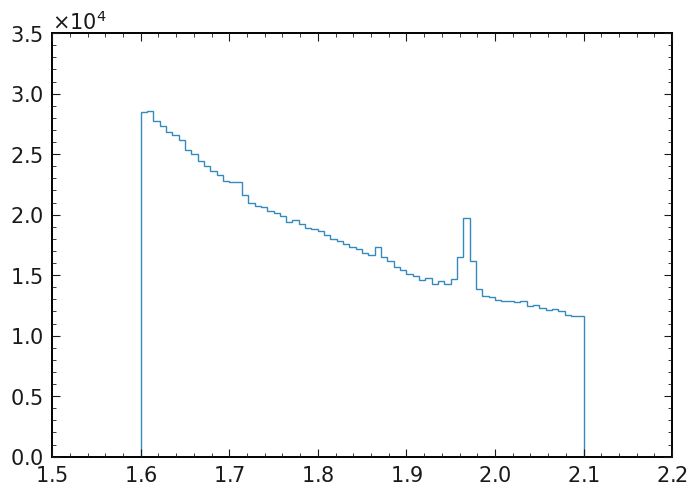

In [86]:
plt.hist(df_combined_all_range['Dp_M'],bins=np.linspace(1.6,2.1,71),histtype='step');

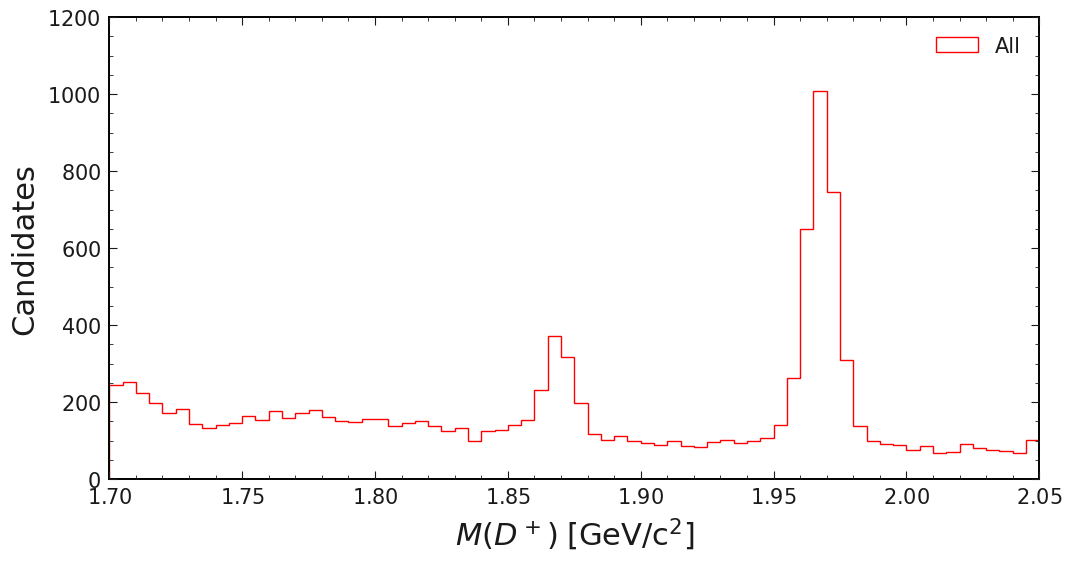

nsig=714
nsig=178.5


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > @optimal_cut')
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='All')

# Histogram for background
# plt.hist(df_background['Dp_M'], bins=np.linspace(1.6, 2.1, 71), histtype='step', color='red', label='Background')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(1.7,2.05)
plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')

# plt.savefig("MC15rd_etapip_pipipi_K_Dp_M_all_loose_v3.png")

plt.show()


scale = 1/4
df_signal_matched_true = df_signal.query('Dp_isSignal==1')
print(f'nsig={len(df_signal_matched_true)}')
print(f'nsig={len(df_signal_matched_true)*scale}')

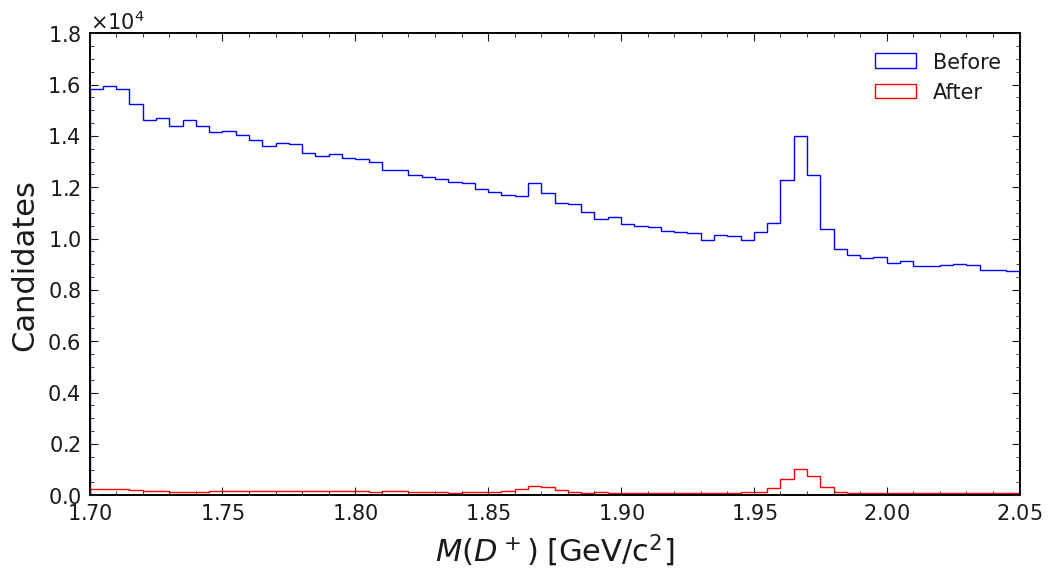

n_before=1268222
n_after=18849
cut eff=0.014862539839239502


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > 0')
df_background = df_combined_all_range.query('prob_signal > @optimal_cut')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='blue', label='Before')

# Histogram for background
plt.hist(df_background['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='After')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)

plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')
plt.xlim(1.7,2.05)
# plt.savefig("MC15rd_etapip_pipipi_K_Dp_M_before_loose_v3.png")

plt.show()



print(f'n_before={len(df_signal)}')
print(f'n_after={len(df_background)}')
print(f'cut eff={len(df_background)/len(df_signal)}')

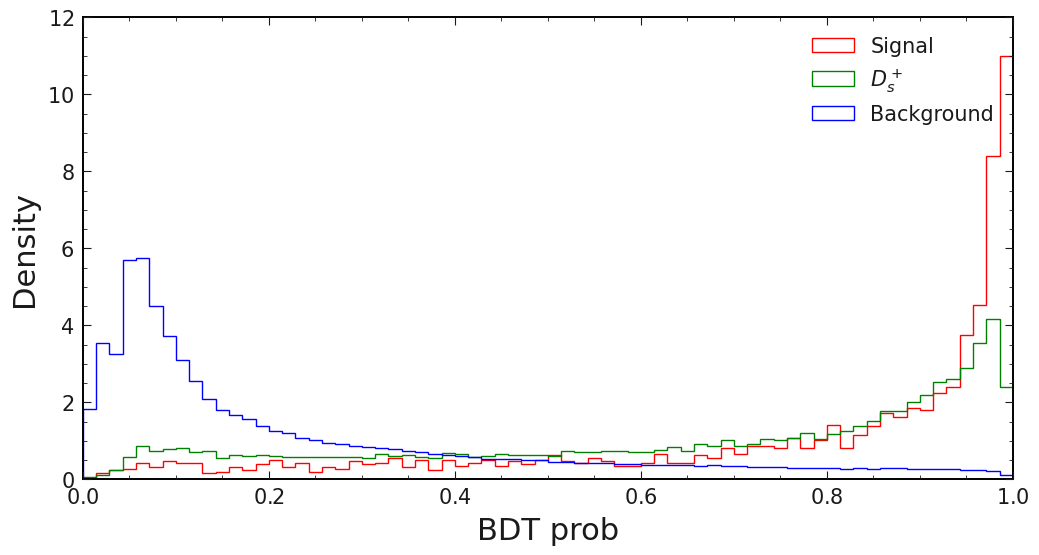

nsig=1778


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('Dp_isSignal==1')
df_background = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_background_Ds = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='red', label='Signal',density=True)
plt.hist(df_background_Ds['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='green', label='$D_s^+$',density=True)

# Histogram for background
plt.hist(df_background['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='blue', label='Background',density=True)

plt.xlabel('BDT prob')
plt.ylabel('Density')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(0,1)
# plt.savefig("MC15rd_etapip_pipipi_K_BDT_output_Dp_Ds_bkg_loose_v3.png")

plt.show()


print(f'nsig={len(df_signal)}')